In [1]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#loading the dataset
df=pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking the number of rows and columns in the dataset
df.shape


(21597, 21)

In [4]:
#checking the names of the 21 columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#checking the datatypes of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#checking th descriptive statistics the the dataset that we have loaded
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#checking if the dataset contains nulls
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#the date field was of object datatype,we need to convert it to datetime datatype
df['date']=pd.to_datetime(df['date'])


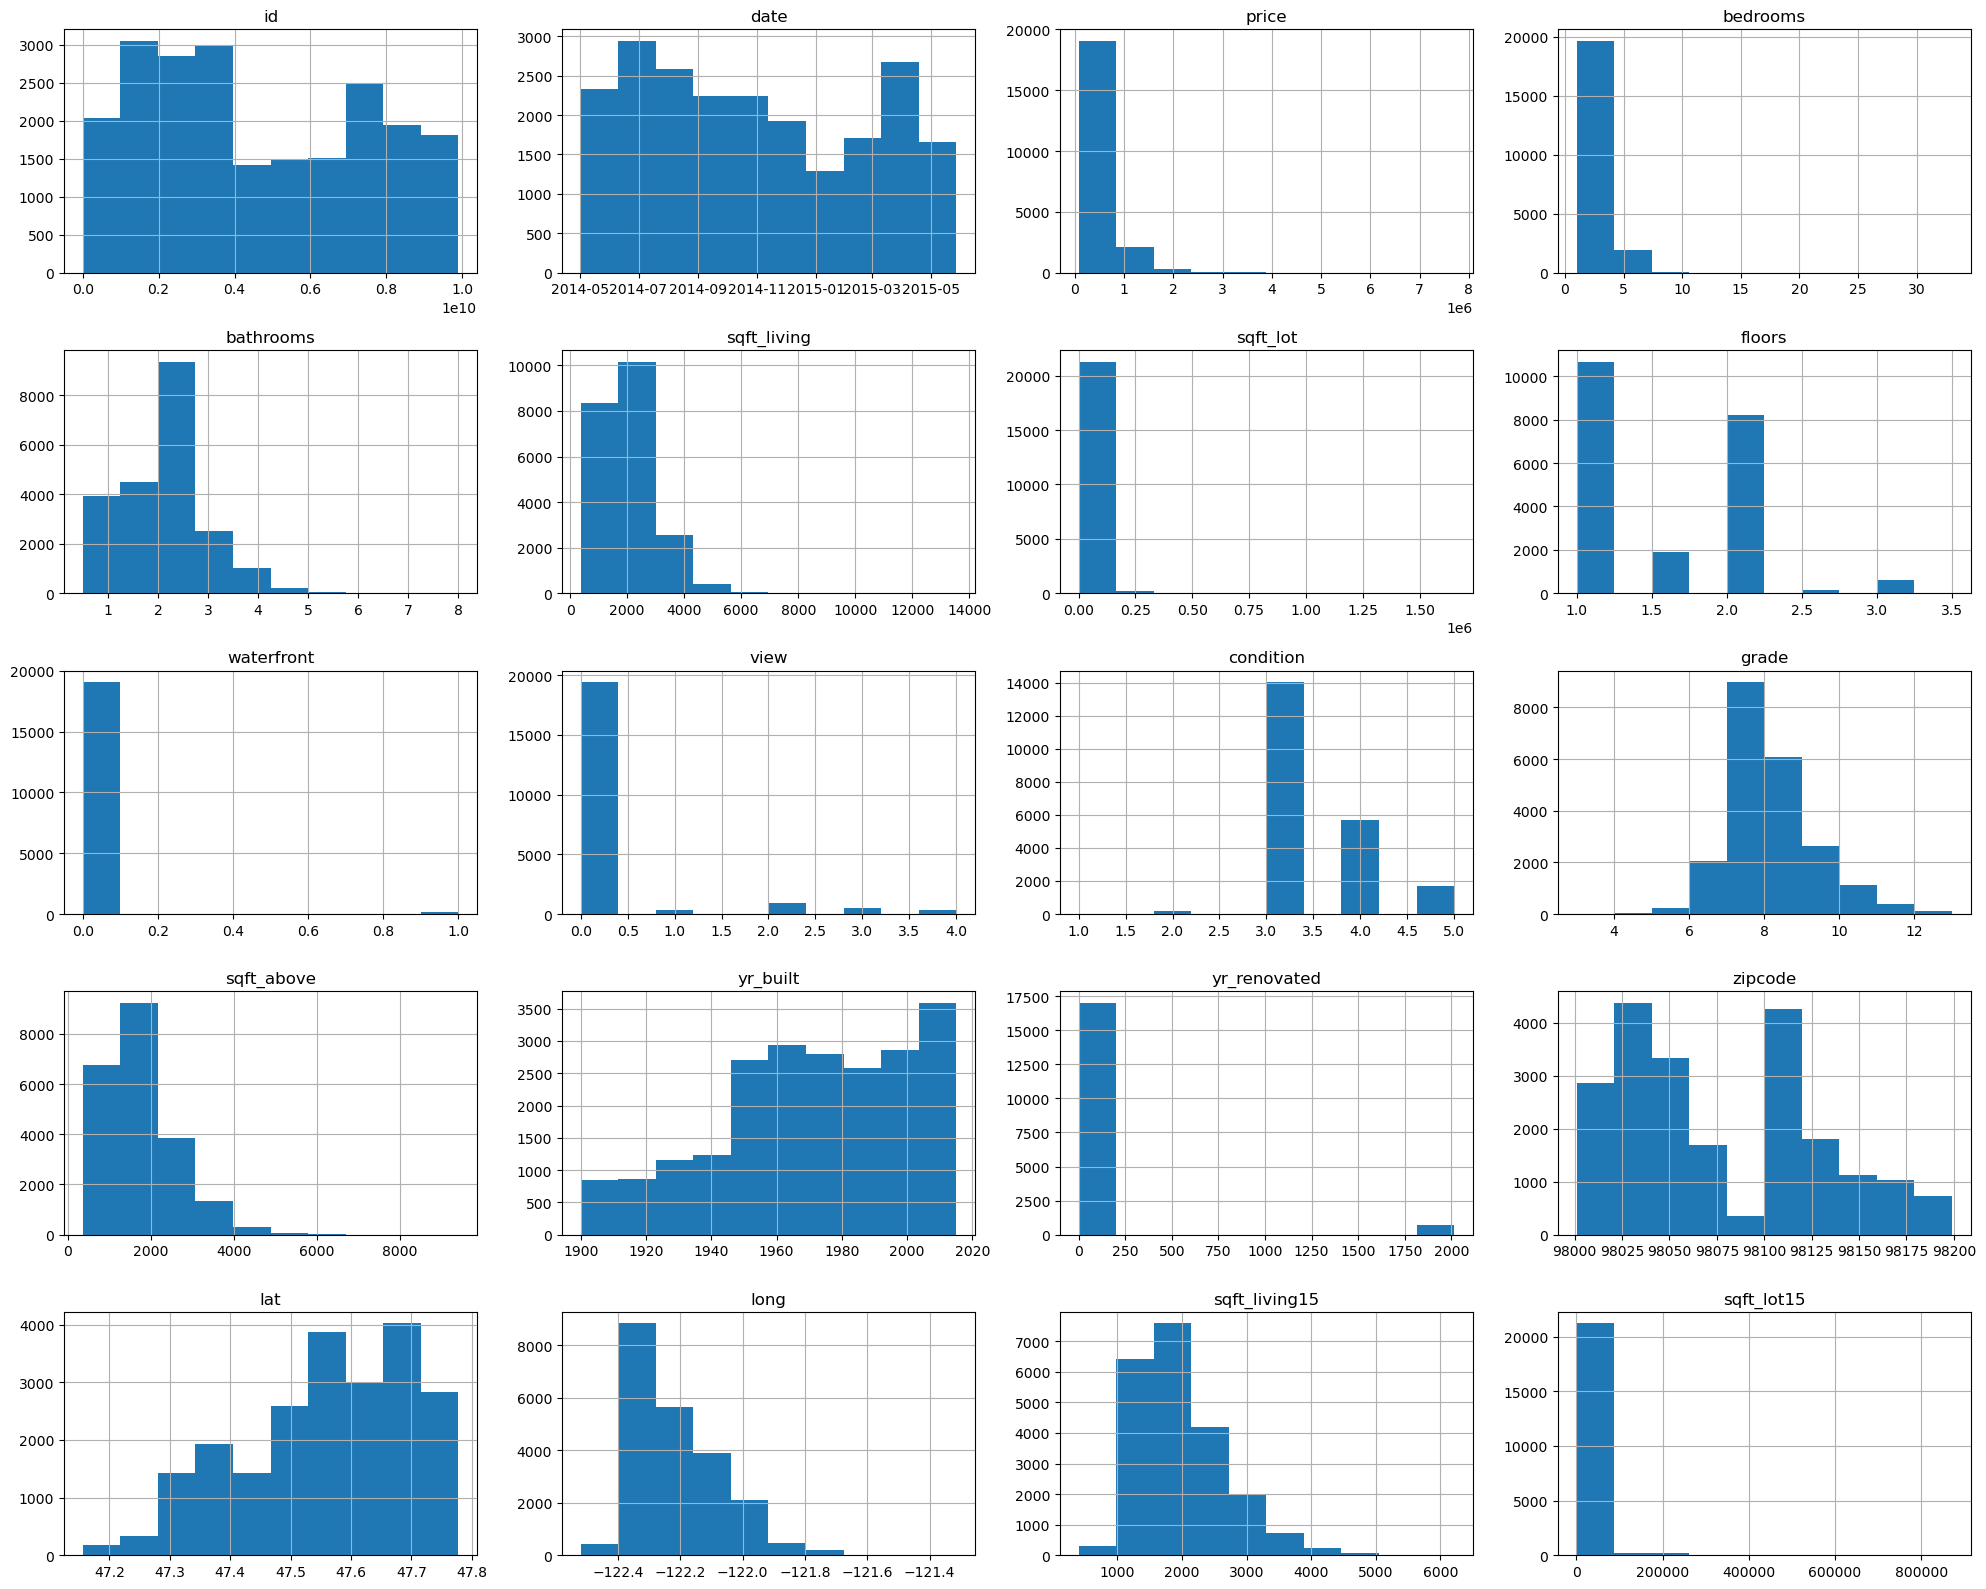

In [9]:
#using histograms to view statistical distributions of different columns in the dataset
df.hist(figsize=(20,16))
plt.tight_layout()
plt.show()

In [10]:
#i did not fill the nulls in the columns as i will not be using those columns in my analyses,
#instead i am creating a new dataframe with the columns that i find would be necessary to predict the house prices
df1 = df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'zipcode']]
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode
0,221900.0,3,1.00,1180,5650,1.0,7,98178
1,538000.0,3,2.25,2570,7242,2.0,7,98125
2,180000.0,2,1.00,770,10000,1.0,6,98028
3,604000.0,4,3.00,1960,5000,1.0,7,98136
4,510000.0,3,2.00,1680,8080,1.0,8,98074


C:\Users\petra.kibugu\AppData\Local\Temp\ipykernel_16032\2397585710.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1.hist(ax = ax);


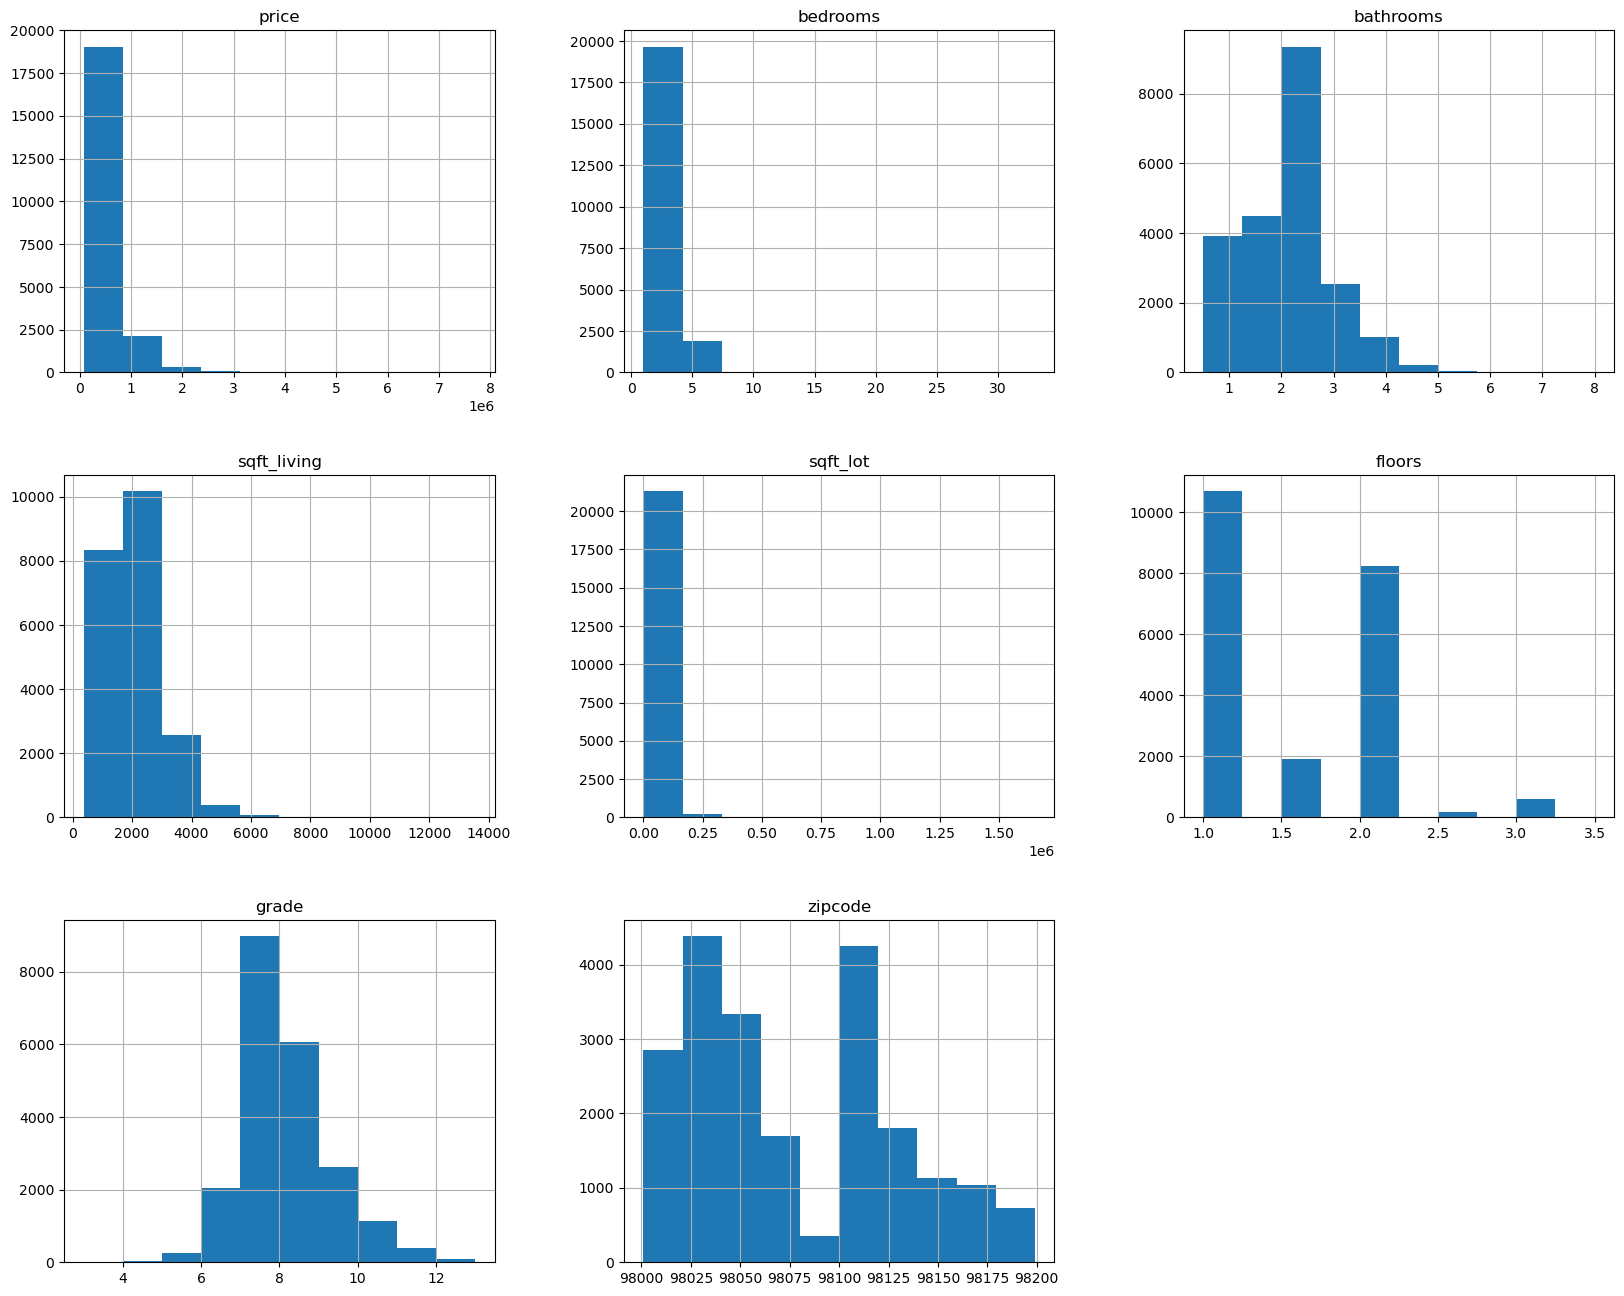

In [11]:
#plotting the histograms of the new dataset
fig = plt.figure(figsize=(20,16))
ax = fig.gca()
df1.hist(ax = ax);

C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

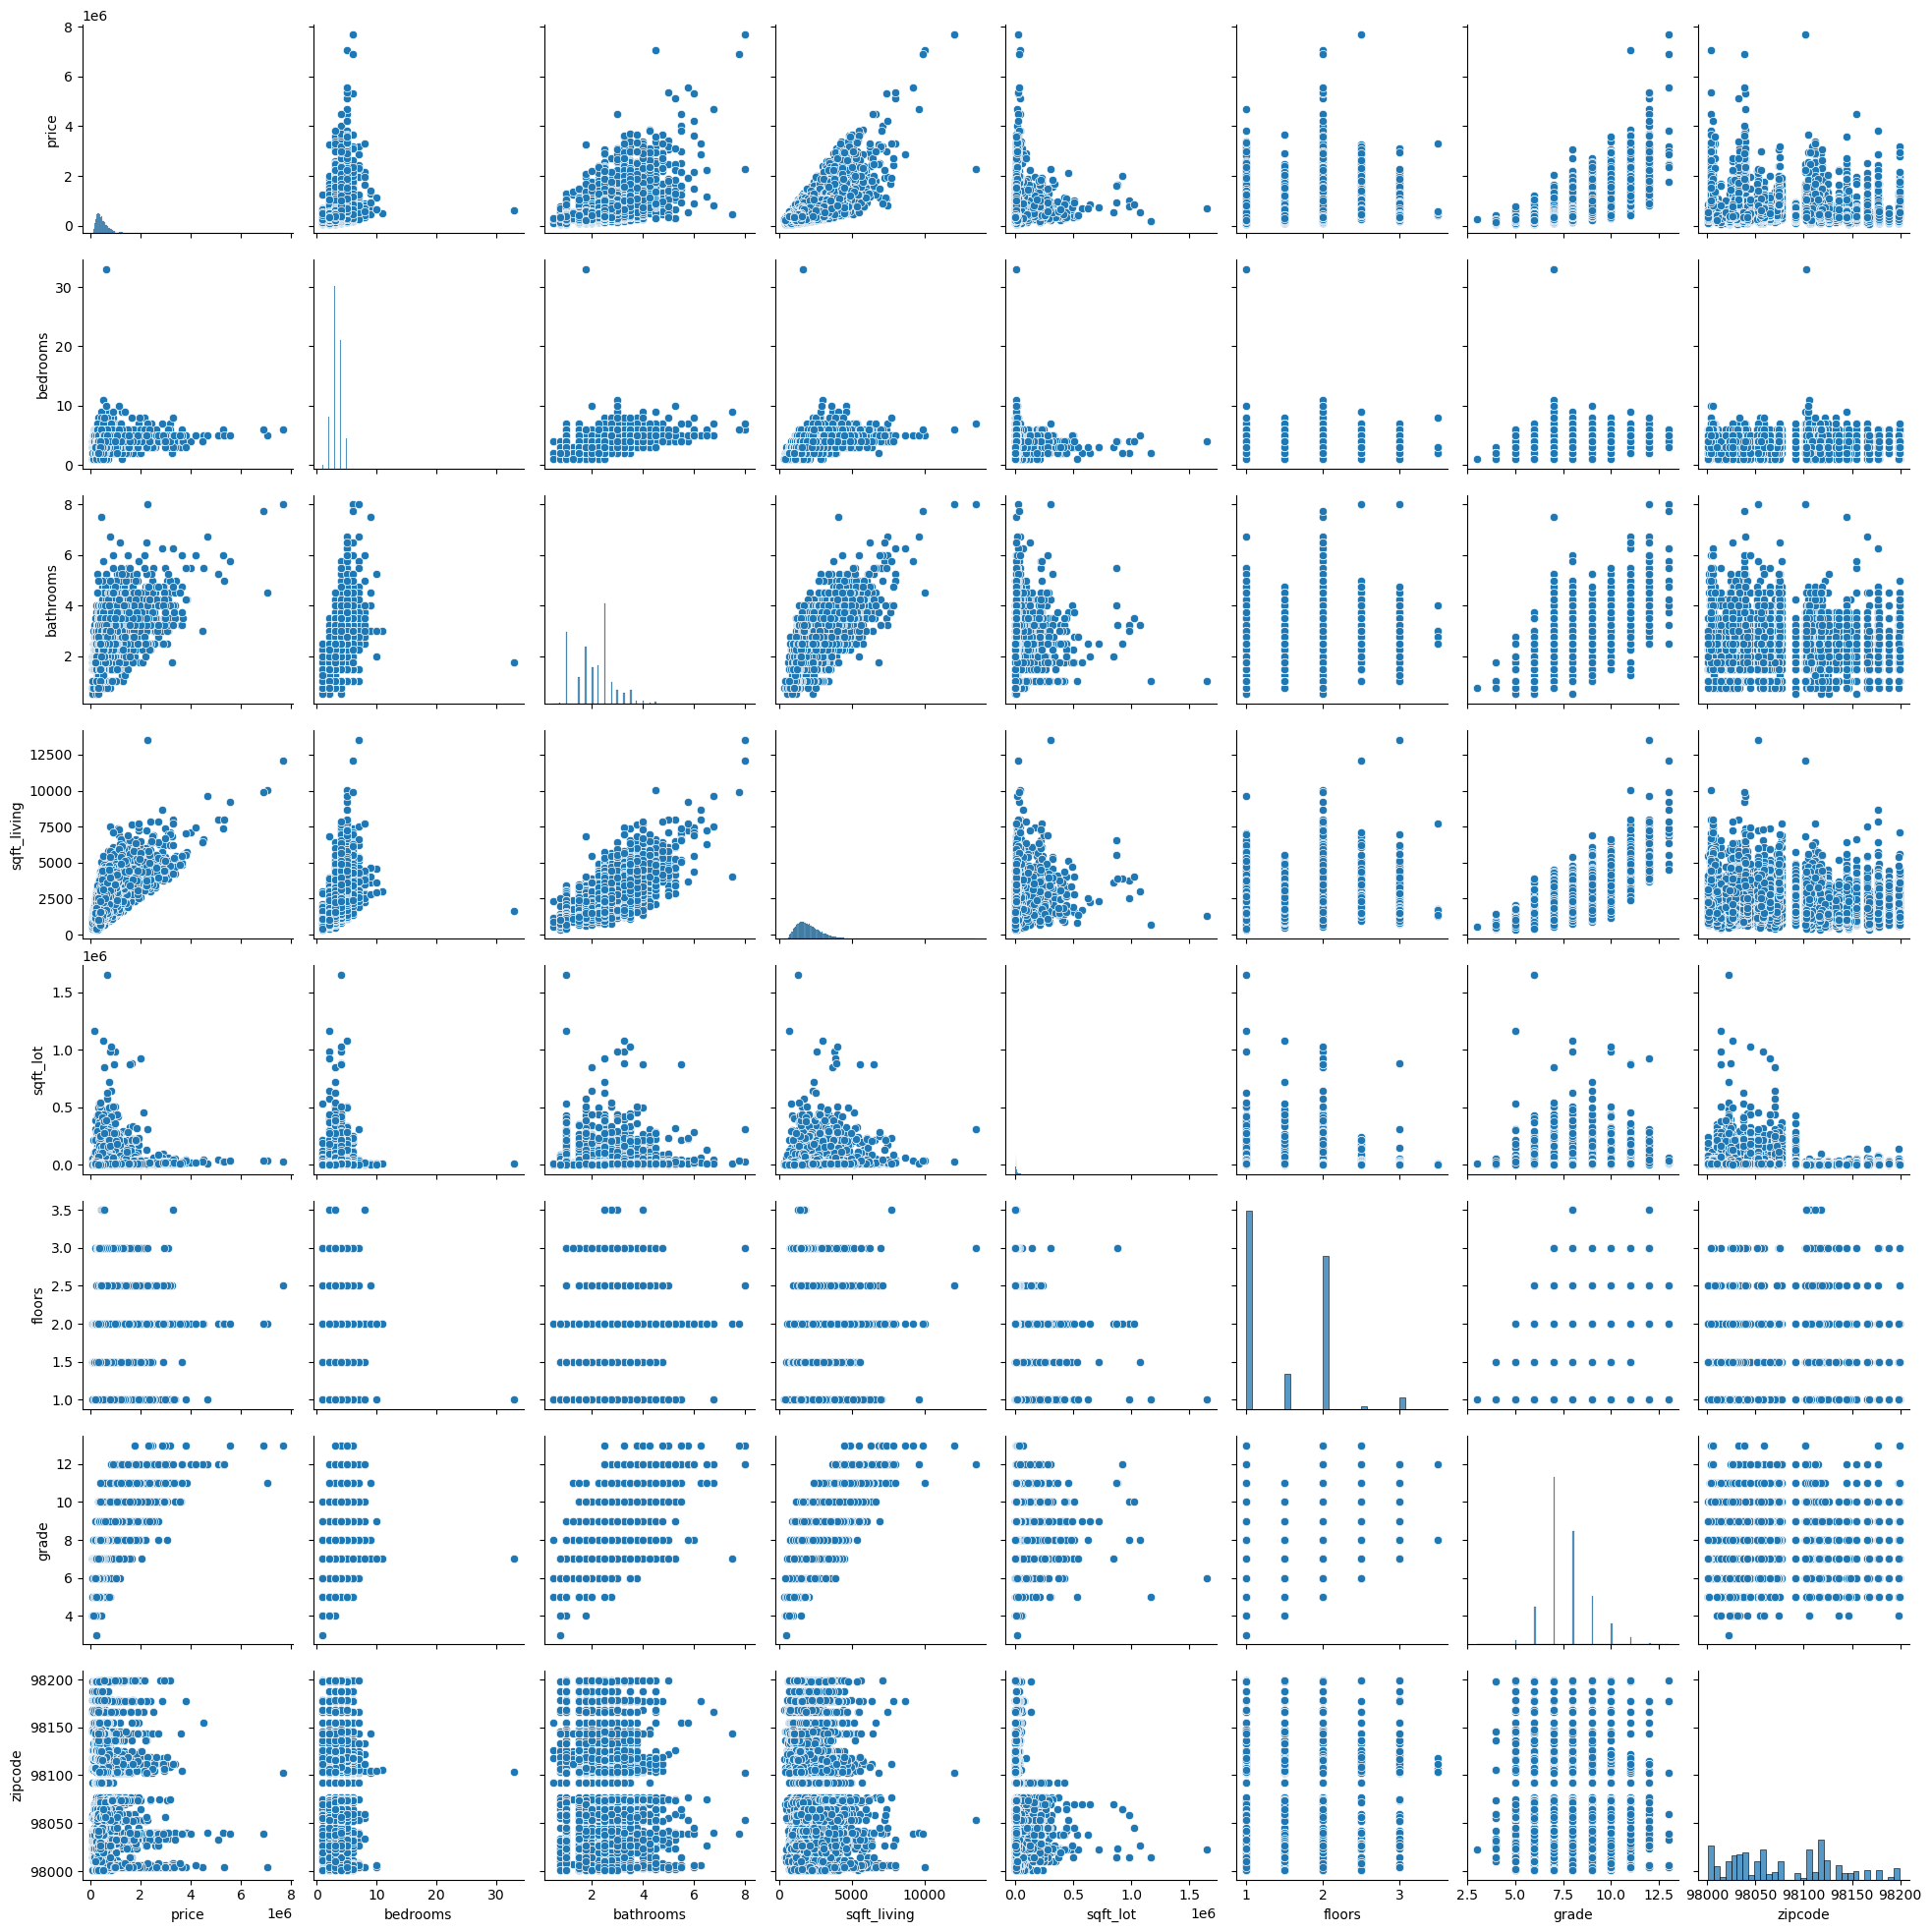

In [12]:
#plotting pairplots to view the correlations
sns.pairplot(df1);

In [13]:
#creating a correlation matrix of the dataframe
correlationmatrix=df1.corr
correlationmatrix()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.667951,-0.053402
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.356563,-0.154092
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.665838,-0.204786
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.762779,-0.199802
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.114731,-0.129586
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.458794,-0.059541
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,1.000000,-0.185771
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.185771,1.000000


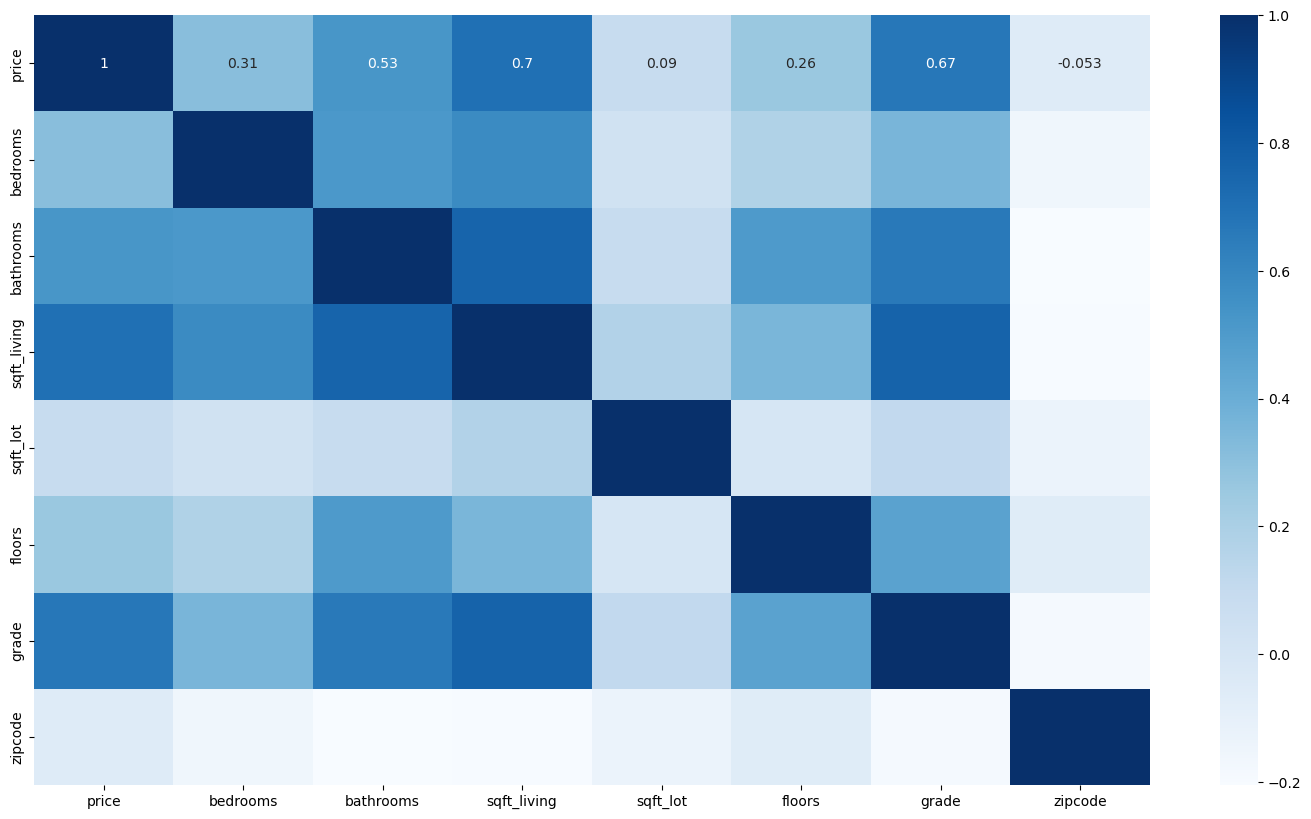

In [14]:
#plotting a heatmap for the above correlation matrix
plt.subplots(figsize = (18,10))
sns.heatmap(correlationmatrix(), annot = True, annot_kws ={'size':10}, cmap='Blues');


In [15]:
#fuction to retrive the correlated features that meet 50% threshold
def getCorrelatedFeatures(fields, threshold):
    features = []
    values = []
    
    for i, index in enumerate(fields.index):
        if abs(fields[index]) > threshold:
            features.append(index)
            values.append(fields[index])
    df1 = pd.DataFrame(data = values, index = features, columns = ['Correlation Values'])
    return df1

In [16]:
#Setting the threshold to 50%
threshold = 0.5

correlationvalues = getCorrelatedFeatures(correlationmatrix()['price'], threshold)
correlationvalues

,Correlation Values
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951


In [17]:
#Creating a new dataframe for the correlated data
correlateddatadf = df[correlationvalues.index]
correlateddatadf.head()

,price,bathrooms,sqft_living,grade
0,221900.0,1.00,1180,7
1,538000.0,2.25,2570,7
2,180000.0,1.00,770,6
3,604000.0,3.00,1960,7
4,510000.0,2.00,1680,8


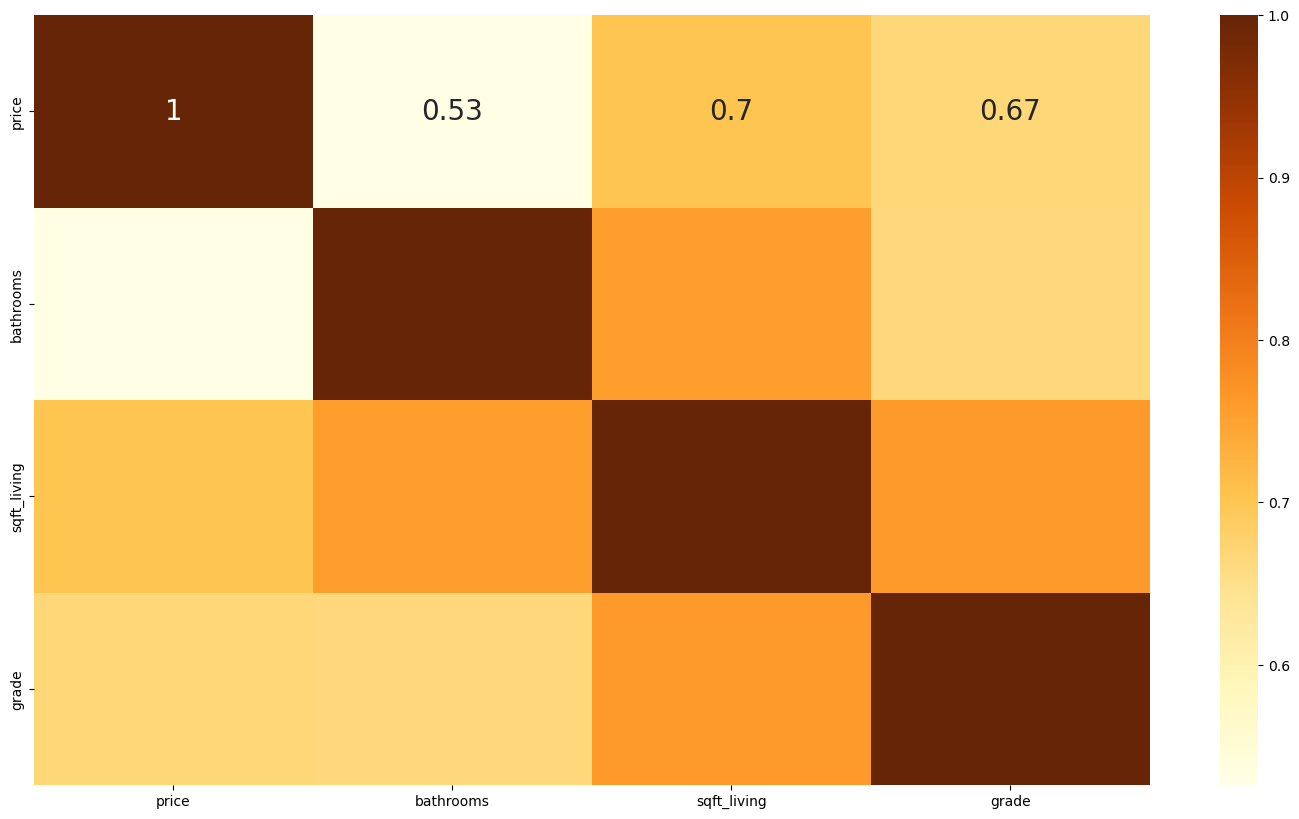

In [18]:
#visualizing the correlation of the features in the new dataframe
plt.subplots(figsize = (18,10))
sns.heatmap(correlateddatadf.corr(), annot = True, annot_kws = {'size':20}, cmap="YlOrBr");

In [19]:
#splitting the correlateddataframe into input and target variables
X = correlateddatadf.drop(labels = ['price'], axis = 1)

Y = correlateddatadf['price']
X.head()

,bathrooms,sqft_living,grade
0,1.00,1180,7
1,2.25,2570,7
2,1.00,770,6
3,3.00,1960,7
4,2.00,1680,8


In [20]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [21]:
X.shape

(21597, 3)

In [22]:
#Splitting the data into test and train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
#training the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
#Getting the y_pred
y_pred = model.predict(X_test)

In [25]:
#getting R2 score, mean absolute error and mean squared error
Rscore = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('r2score is ', Rscore)
print('mae is ', mae)
print('mse is ', mse)

r2score is  0.5236356475434574
mae is  161180.4223665728
mse is  56076411416.08098


In [26]:

from statsmodels.formula.api import ols
import statsmodels
multiple_formula = 'price ~ bathrooms + sqft_living + grade'
multiple_model =  ols(formula=multiple_formula, data=df1).fit()
multiple_model_summary = multiple_model.summary()
# YOUR CODE HERE
#raise NotImplementedError()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:16:48   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

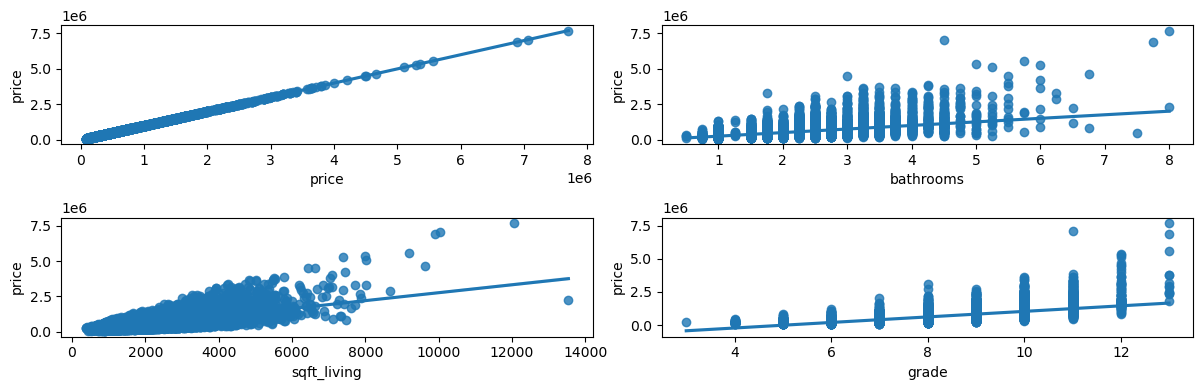

In [27]:
#Viewing the linear relationship between correlated features against price
rows = 2
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (12,4))
col = correlateddatadf.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlateddatadf[col[index]], y = correlateddatadf['price'], ax = ax[i][j])
        index += 1

plt.tight_layout()